In [337]:
import pandas as pd
import numpy as np

In [338]:
con = pd.read_csv('/content/drive/MyDrive/Internship Projects/Week-4/Metadata_Country.csv')
pop = pd.read_csv('/content/drive/MyDrive/Internship Projects/Week-4/country_population.csv')
fer = pd.read_csv('/content/drive/MyDrive/Internship Projects/Week-4/fertility_rate.csv')
life = pd.read_csv('/content/drive/MyDrive/Internship Projects/Week-4/life_expectancy.csv')

In [339]:
life.shape

(264, 61)

In [340]:
con.shape

(263, 6)

In [341]:
pop.shape

(264, 61)

In [342]:
fer.shape

(264, 61)

In [343]:
con.columns = con.columns.str.lower().str.replace(' ','-')
pop.columns = pop.columns.str.lower().str.replace(' ','-')
fer.columns = fer.columns.str.lower().str.replace(' ','-')
life.columns = life.columns.str.lower().str.replace(' ','-')

#1. Country

In [344]:
con.head()

,country-code,region,incomegroup,specialnotes,tablename,unnamed:-5
0,ABW,Latin America & Caribbean,High income,SNA data for 2000-2011 are updated from offici...,Aruba,NaN
1,AFG,South Asia,Low income,Fiscal year end: March 20; reporting period fo...,Afghanistan,NaN
2,AGO,Sub-Saharan Africa,Lower middle income,NaN,Angola,NaN
3,ALB,Europe & Central Asia,Upper middle income,NaN,Albania,NaN
4,AND,Europe & Central Asia,High income,WB-3 code changed from ADO to AND to align wit...,Andorra,NaN


In [345]:
con.columns

Index(['country-code', 'region', 'incomegroup', 'specialnotes', 'tablename',
       'unnamed:-5'],
      dtype='object')

In [346]:
con = con[['country-code','region']]

In [347]:
con.isnull().sum()

country-code     0
region          46
dtype: int64

In [348]:
con.shape

(263, 2)

In [349]:
con.dropna(inplace = True)

In [350]:
con.isna().sum()

country-code    0
region          0
dtype: int64

In [351]:
con.shape

(217, 2)

In [352]:
con.head()

,country-code,region
0,ABW,Latin America & Caribbean
1,AFG,South Asia
2,AGO,Sub-Saharan Africa
3,ALB,Europe & Central Asia
4,AND,Europe & Central Asia


In [353]:
con.region = con.region.str.lower()

In [354]:
con.head()

,country-code,region
0,ABW,latin america & caribbean
1,AFG,south asia
2,AGO,sub-saharan africa
3,ALB,europe & central asia
4,AND,europe & central asia


In [355]:
duplicates_columns = con.duplicated()

In [356]:
con[duplicates_columns]

,country-code,region


#2. Population

In [357]:
pop.head()

,country-name,country-code,indicator-name,indicator-code,1960,1961,1962,1963,1964,1965,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101220.0,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,26616792.0,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0
2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,...,20997687.0,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2970017.0,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,82683.0,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0


In [358]:
pop.columns

Index(['country-name', 'country-code', 'indicator-name', 'indicator-code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016'],
      dtype='object')

In [359]:
pop.drop(['indicator-name','indicator-code'],axis = 1, inplace = True)

In [360]:
pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 59 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country-name  264 non-null    object 
 1   country-code  264 non-null    object 
 2   1960          260 non-null    float64
 3   1961          260 non-null    float64
 4   1962          260 non-null    float64
 5   1963          260 non-null    float64
 6   1964          260 non-null    float64
 7   1965          260 non-null    float64
 8   1966          260 non-null    float64
 9   1967          260 non-null    float64
 10  1968          260 non-null    float64
 11  1969          260 non-null    float64
 12  1970          260 non-null    float64
 13  1971          260 non-null    float64
 14  1972          260 non-null    float64
 15  1973          260 non-null    float64
 16  1974          260 non-null    float64
 17  1975          260 non-null    float64
 18  1976          260 non-null    

In [361]:
pop.shape

(264, 59)

In [362]:
pop.isna().sum()

country-name    0
country-code    0
1960            4
1961            4
1962            4
1963            4
1964            4
1965            4
1966            4
1967            4
1968            4
1969            4
1970            4
1971            4
1972            4
1973            4
1974            4
1975            4
1976            4
1977            4
1978            4
1979            4
1980            4
1981            4
1982            4
1983            4
1984            4
1985            4
1986            4
1987            4
1988            4
1989            4
1990            2
1991            2
1992            3
1993            3
1994            3
1995            2
1996            2
1997            2
1998            1
1999            1
2000            1
2001            1
2002            1
2003            1
2004            1
2005            1
2006            1
2007            1
2008            1
2009            1
2010            1
2011            1
2012            2
2013      

In [363]:
pop.dropna(subset=pop.columns[2:],how='all', inplace=True) # Dropping null value rows where each column contains null value except first 2 columns

In [364]:
pop.shape

(263, 59)

In [365]:
pop['country-name'] = pop['country-name'].str.lower()

In [366]:
pop['country-name']

0             aruba
1       afghanistan
2            angola
3           albania
4           andorra
           ...     
259          kosovo
260     yemen, rep.
261    south africa
262          zambia
263        zimbabwe
Name: country-name, Length: 263, dtype: object

#3. Fertility

In [367]:
fer.shape

(264, 61)

In [368]:
fer.head()

,country-name,country-code,indicator-name,indicator-code,1960,1961,1962,1963,1964,1965,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Aruba,ABW,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,4.820,4.655,4.471,4.271,4.059,3.842,...,1.763,1.764,1.769,1.776,1.783,1.791,1.796,1.800,1.801,1.800
1,Afghanistan,AFG,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,7.450,7.450,7.450,7.450,7.450,7.450,...,6.460,6.254,6.038,5.816,5.595,5.380,5.174,4.981,4.802,4.635
2,Angola,AGO,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,7.478,7.524,7.563,7.592,7.611,7.619,...,6.368,6.307,6.238,6.162,6.082,6.000,5.920,5.841,5.766,5.694
3,Albania,ALB,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,6.489,6.401,6.282,6.133,5.960,5.773,...,1.668,1.650,1.646,1.653,1.668,1.685,1.700,1.710,1.714,1.713
4,Andorra,AND,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.180,1.250,1.190,1.270,NaN,NaN,NaN,NaN,NaN,NaN


In [369]:
fer.drop(['indicator-name','indicator-code'],axis = 1, inplace = True)

In [370]:
fer.head()

,country-name,country-code,1960,1961,1962,1963,1964,1965,1966,1967,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Aruba,ABW,4.820,4.655,4.471,4.271,4.059,3.842,3.625,3.417,...,1.763,1.764,1.769,1.776,1.783,1.791,1.796,1.800,1.801,1.800
1,Afghanistan,AFG,7.450,7.450,7.450,7.450,7.450,7.450,7.450,7.450,...,6.460,6.254,6.038,5.816,5.595,5.380,5.174,4.981,4.802,4.635
2,Angola,AGO,7.478,7.524,7.563,7.592,7.611,7.619,7.618,7.613,...,6.368,6.307,6.238,6.162,6.082,6.000,5.920,5.841,5.766,5.694
3,Albania,ALB,6.489,6.401,6.282,6.133,5.960,5.773,5.581,5.394,...,1.668,1.650,1.646,1.653,1.668,1.685,1.700,1.710,1.714,1.713
4,Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.180,1.250,1.190,1.270,NaN,NaN,NaN,NaN,NaN,NaN


In [371]:
fer['country-name'] = fer['country-name'].str.lower()

In [372]:
fer['country-name']

0             aruba
1       afghanistan
2            angola
3           albania
4           andorra
           ...     
259          kosovo
260     yemen, rep.
261    south africa
262          zambia
263        zimbabwe
Name: country-name, Length: 264, dtype: object

In [373]:
fer.shape

(264, 59)

In [374]:
fer.dropna(subset=fer.columns[2:],how='all', inplace=True) # Dropping null value rows where each column contains null value except first 2 columns

In [375]:
fer.shape

(254, 59)

#4. Life

In [376]:
life.head()

,country-name,country-code,indicator-name,indicator-code,1960,1961,1962,1963,1964,1965,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Aruba,ABW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,65.662,66.074,66.444,66.787,67.113,67.435,...,74.576,74.725,74.872,75.016,75.158,75.299,75.440,75.582,75.725,75.867
1,Afghanistan,AFG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,32.292,32.742,33.185,33.624,34.060,34.495,...,59.694,60.243,60.754,61.226,61.666,62.086,62.494,62.895,63.288,63.673
2,Angola,AGO,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,33.251,33.573,33.914,34.272,34.645,35.031,...,55.096,56.189,57.231,58.192,59.042,59.770,60.373,60.858,61.241,61.547
3,Albania,ALB,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,62.279,63.298,64.187,64.911,65.461,65.848,...,75.656,75.943,76.281,76.652,77.031,77.389,77.702,77.963,78.174,78.345
4,Andorra,AND,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [377]:
life.drop(['indicator-name','indicator-code'],axis = 1, inplace = True)

In [378]:
life.head()

,country-name,country-code,1960,1961,1962,1963,1964,1965,1966,1967,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Aruba,ABW,65.662,66.074,66.444,66.787,67.113,67.435,67.762,68.095,...,74.576,74.725,74.872,75.016,75.158,75.299,75.440,75.582,75.725,75.867
1,Afghanistan,AFG,32.292,32.742,33.185,33.624,34.060,34.495,34.928,35.361,...,59.694,60.243,60.754,61.226,61.666,62.086,62.494,62.895,63.288,63.673
2,Angola,AGO,33.251,33.573,33.914,34.272,34.645,35.031,35.426,35.828,...,55.096,56.189,57.231,58.192,59.042,59.770,60.373,60.858,61.241,61.547
3,Albania,ALB,62.279,63.298,64.187,64.911,65.461,65.848,66.108,66.302,...,75.656,75.943,76.281,76.652,77.031,77.389,77.702,77.963,78.174,78.345
4,Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [379]:
life['country-name'] = life['country-name'].str.lower()

In [380]:
life['country-name']

0             aruba
1       afghanistan
2            angola
3           albania
4           andorra
           ...     
259          kosovo
260     yemen, rep.
261    south africa
262          zambia
263        zimbabwe
Name: country-name, Length: 264, dtype: object

In [381]:
life.shape

(264, 59)

In [382]:
life.dropna(subset=life.columns[2:],how='all', inplace=True) # Dropping null value rows where each column contains null value except first 2 columns

In [383]:
life.shape

(254, 59)

#Melt()

In [384]:
years = [str(i) for i in range(1960,2017)]

#population

In [385]:
dfp = pd.melt(pop,
             id_vars =['country-code','country-name'],
             value_vars = years,
             var_name ='year',
             value_name = 'population'
             )

dfp.head()

,country-code,country-name,year,population
0,ABW,aruba,1960,54211.0
1,AFG,afghanistan,1960,8996351.0
2,AGO,angola,1960,5643182.0
3,ALB,albania,1960,1608800.0
4,AND,andorra,1960,13411.0


In [386]:
dfp['country-code'].value_counts()

ABW    57
MWI    57
NAC    57
NAM    57
NCL    57
       ..
HIC    57
HKG    57
HND    57
HPC    57
ZWE    57
Name: country-code, Length: 263, dtype: int64

In [387]:
dfp.shape

(14991, 4)

In [388]:
dfp.isnull().sum()

country-code      0
country-name      0
year              0
population      106
dtype: int64

In [389]:
dfp = dfp.dropna()

In [390]:
dfp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14885 entries, 0 to 14990
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country-code  14885 non-null  object 
 1   country-name  14885 non-null  object 
 2   year          14885 non-null  object 
 3   population    14885 non-null  float64
dtypes: float64(1), object(3)
memory usage: 581.4+ KB


In [391]:
dfp.population = dfp.population.astype(int)

In [392]:
dfp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14885 entries, 0 to 14990
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   country-code  14885 non-null  object
 1   country-name  14885 non-null  object
 2   year          14885 non-null  object
 3   population    14885 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 581.4+ KB


#fertility

In [393]:
dff = pd.melt(fer,
             id_vars =['country-code','country-name'],
             value_vars = years,
             var_name ='year',
             value_name = 'fertility-rate'
             )

dff.head()

,country-code,country-name,year,fertility-rate
0,ABW,aruba,1960,4.820
1,AFG,afghanistan,1960,7.450
2,AGO,angola,1960,7.478
3,ALB,albania,1960,6.489
4,AND,andorra,1960,NaN


In [394]:
dff['country-code'].value_counts()

ABW    57
OSS    57
MYS    57
NAC    57
NAM    57
       ..
GUY    57
HIC    57
HKG    57
HND    57
ZWE    57
Name: country-code, Length: 254, dtype: int64

In [395]:
dff.isnull().sum()

country-code        0
country-name        0
year                0
fertility-rate    708
dtype: int64

In [396]:
dff = dff.dropna()

In [397]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13770 entries, 0 to 14477
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country-code    13770 non-null  object 
 1   country-name    13770 non-null  object 
 2   year            13770 non-null  object 
 3   fertility-rate  13770 non-null  float64
dtypes: float64(1), object(3)
memory usage: 537.9+ KB


In [398]:
dff.sample(5)

,country-code,country-name,year,fertility-rate
560,DJI,djibouti,1962,6.527
905,MDA,moldova,1963,3.086
1663,LVA,latvia,1966,1.760
11901,SYC,seychelles,2006,2.110
8801,NER,niger,1994,7.734


In [399]:
dff['fertility-rate'] = dff['fertility-rate'].round(3)

<ipython-input-399-d2bc4aced9b2>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [400]:
dff.head()

,country-code,country-name,year,fertility-rate
0,ABW,aruba,1960,4.820
1,AFG,afghanistan,1960,7.450
2,AGO,angola,1960,7.478
3,ALB,albania,1960,6.489
5,ARB,arab world,1960,6.949


#life expectancy

In [401]:
dfl = pd.melt(life,
             id_vars =['country-code','country-name'],
             value_vars = years,
             var_name ='year',
             value_name = 'life-expectency'
             )

dfl.head()

,country-code,country-name,year,life-expectency
0,ABW,aruba,1960,65.662000
1,AFG,afghanistan,1960,32.292000
2,AGO,angola,1960,33.251000
3,ALB,albania,1960,62.279000
4,ARB,arab world,1960,46.825065


In [402]:
dfl.isnull().sum()

country-code         0
country-name         0
year                 0
life-expectency    731
dtype: int64

In [403]:
dfl = dfl.dropna()

In [404]:
dfl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13747 entries, 0 to 14477
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country-code     13747 non-null  object 
 1   country-name     13747 non-null  object 
 2   year             13747 non-null  object 
 3   life-expectency  13747 non-null  float64
dtypes: float64(1), object(3)
memory usage: 537.0+ KB


In [405]:
dfl['life-expectency'] = dfl['life-expectency'].round(3)

<ipython-input-405-a1f28aab06a6>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [406]:
dfl.head()

,country-code,country-name,year,life-expectency
0,ABW,aruba,1960,65.662
1,AFG,afghanistan,1960,32.292
2,AGO,angola,1960,33.251
3,ALB,albania,1960,62.279
4,ARB,arab world,1960,46.825


#merge

Merged population

In [407]:
df_merged = pd.merge(con,dfp,how='left',on='country-code')
df_merged.head()

,country-code,region,country-name,year,population
0,ABW,latin america & caribbean,aruba,1960,54211
1,ABW,latin america & caribbean,aruba,1961,55438
2,ABW,latin america & caribbean,aruba,1962,56225
3,ABW,latin america & caribbean,aruba,1963,56695
4,ABW,latin america & caribbean,aruba,1964,57032


In [408]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12263 entries, 0 to 12262
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   country-code  12263 non-null  object
 1   region        12263 non-null  object
 2   country-name  12263 non-null  object
 3   year          12263 non-null  object
 4   population    12263 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 574.8+ KB


Merged fertility rate

In [409]:
merged_df = pd.merge(df_merged, dff, on=['country-code', 'year','country-name'],how='left')
merged_df.head()

,country-code,region,country-name,year,population,fertility-rate
0,ABW,latin america & caribbean,aruba,1960,54211,4.820
1,ABW,latin america & caribbean,aruba,1961,55438,4.655
2,ABW,latin america & caribbean,aruba,1962,56225,4.471
3,ABW,latin america & caribbean,aruba,1963,56695,4.271
4,ABW,latin america & caribbean,aruba,1964,57032,4.059


In [410]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12263 entries, 0 to 12262
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country-code    12263 non-null  object 
 1   region          12263 non-null  object 
 2   country-name    12263 non-null  object 
 3   year            12263 non-null  object 
 4   population      12263 non-null  int64  
 5   fertility-rate  11136 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 670.6+ KB


Merged life-expectency

In [411]:
final_merged_df = pd.merge(merged_df, dfl, on=['country-code', 'year','country-name'], how='left')
final_merged_df.head()

,country-code,region,country-name,year,population,fertility-rate,life-expectency
0,ABW,latin america & caribbean,aruba,1960,54211,4.820,65.662
1,ABW,latin america & caribbean,aruba,1961,55438,4.655,66.074
2,ABW,latin america & caribbean,aruba,1962,56225,4.471,66.444
3,ABW,latin america & caribbean,aruba,1963,56695,4.271,66.787
4,ABW,latin america & caribbean,aruba,1964,57032,4.059,67.113


In [412]:
final_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12263 entries, 0 to 12262
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country-code     12263 non-null  object 
 1   region           12263 non-null  object 
 2   country-name     12263 non-null  object 
 3   year             12263 non-null  object 
 4   population       12263 non-null  int64  
 5   fertility-rate   11136 non-null  float64
 6   life-expectency  11117 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 766.4+ KB


In [413]:
final_merged_df.year = final_merged_df.year.astype(int)

In [414]:
final_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12263 entries, 0 to 12262
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country-code     12263 non-null  object 
 1   region           12263 non-null  object 
 2   country-name     12263 non-null  object 
 3   year             12263 non-null  int64  
 4   population       12263 non-null  int64  
 5   fertility-rate   11136 non-null  float64
 6   life-expectency  11117 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 766.4+ KB


In [415]:
final_merged_df.isnull().sum()

country-code          0
region                0
country-name          0
year                  0
population            0
fertility-rate     1127
life-expectency    1146
dtype: int64

In [416]:
final_merged_df = final_merged_df.dropna()

In [417]:
final_merged_df.isnull().sum()

country-code       0
region             0
country-name       0
year               0
population         0
fertility-rate     0
life-expectency    0
dtype: int64

In [418]:
final_merged_df.shape

(11088, 7)

#Box Plot:

In [419]:
import plotly.express as px

fig = px.box(
    final_merged_df,
    x='region',
    y='life-expectency',
    title='Box Plot: Life Expectancy by Region',
    hover_data=['country-name'],
)


fig.update_layout(
    autosize=False,
    width=1200,  # width
    height=600,  # height
    margin=dict(l=50, r=50, b=100, t=100),
)

fig.show()


#Line Plot:

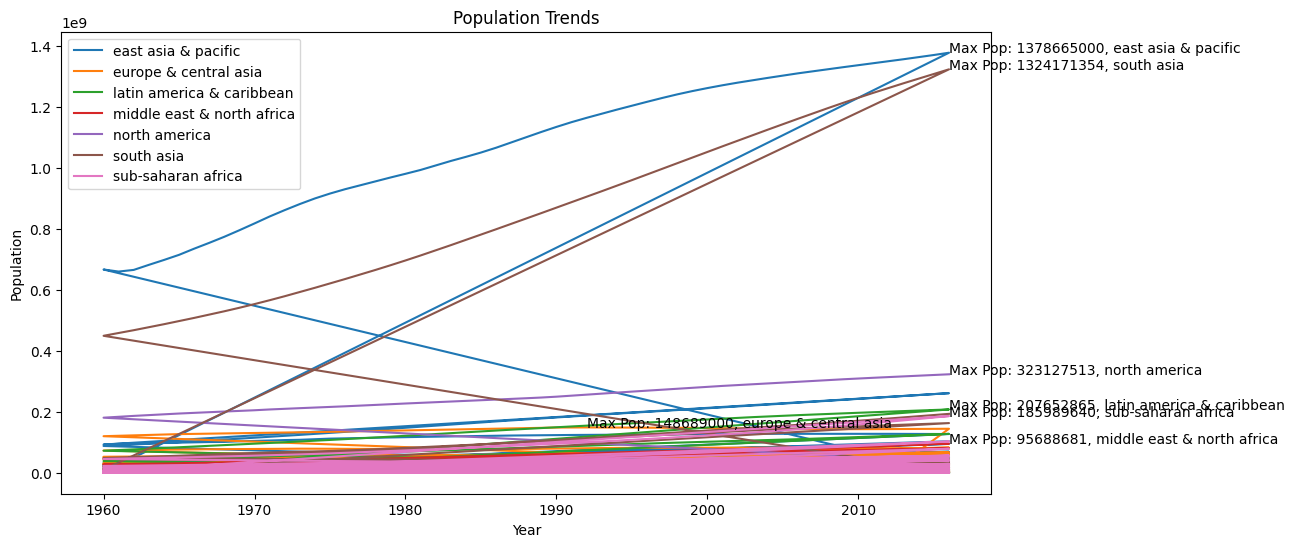

In [420]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
for continent, data in final_merged_df.groupby('region'):
    plt.plot(data['year'], data['population'], label=continent)

    max_population_idx = data['population'].idxmax()
    max_population = data.loc[max_population_idx, 'population']
    max_year = data.loc[max_population_idx, 'year']
    region = data.loc[max_population_idx, 'region']

    plt.annotate(f'Max Pop: {max_population}, {region}',
                 xy=(max_year, max_population),
                 xytext=(max_year, max_population + 5),
                 )

plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population Trends')
plt.legend()
plt.show()

#Heatmap for Correlation Analysis

<ipython-input-421-e942d2916eaa>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



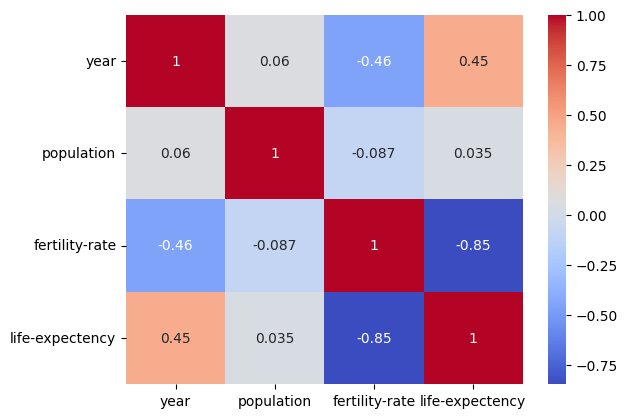

In [421]:
correlation_matrix = final_merged_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

#Bar Plot for Regional Analysis:

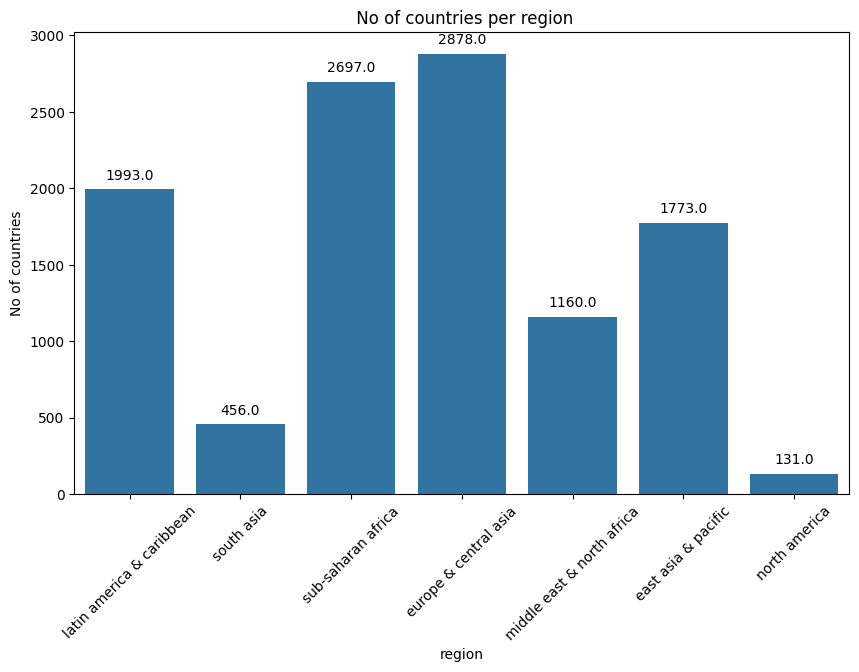

In [422]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='region', data=final_merged_df)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.ylabel('No of countries')
plt.title(' No of countries per region')
plt.xticks(rotation=45)
plt.show()


#Histogram:

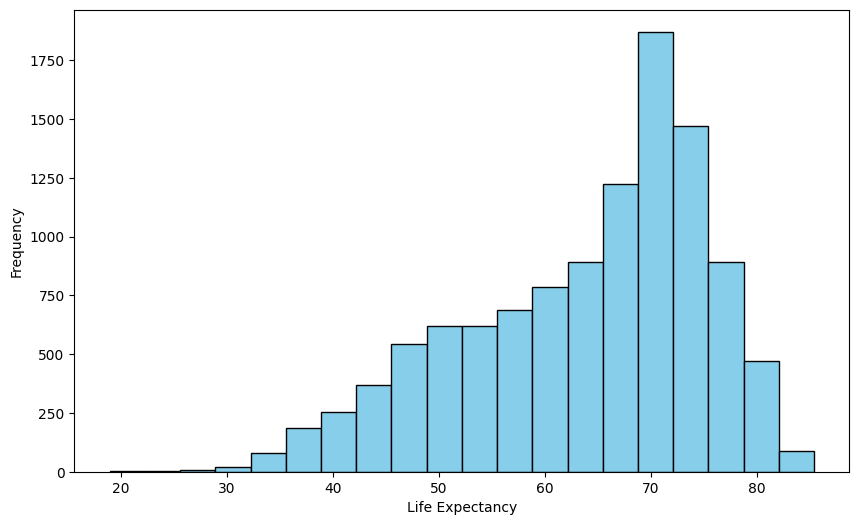

In [423]:
plt.figure(figsize=(10, 6))
plt.hist(final_merged_df['life-expectency'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Life Expectancy')
plt.ylabel('Frequency')
plt.show()

#Annimation

In [424]:
import plotly.express as px

In [425]:
x_column = 'fertility-rate'
y_column = 'life-expectency'
size_column = 'population'
color_column = 'region'
animation_frame = 'year'

In [426]:
fig = px.scatter(
    final_merged_df,
    x=x_column,
    y=y_column,
    size=size_column,
    color=color_column,
    animation_frame=animation_frame,
    size_max = 50,
    range_x = [1,10],
    range_y = [10,100],
    title=f'{x_column} vs {y_column} (Animated by {animation_frame})'
)


In [427]:
fig.update_layout(
    autosize=False,
    width=1200,  # width
    height=800,  #  height
    margin=dict(l=50, r=50, b=100, t=100),  # margins
)


fig.show()